<a href="https://colab.research.google.com/github/andreiamferreira/image-processing-course/blob/redimensionamento-imagens/Redimensionamento_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2 # importando a biblioteca OpenCv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Leitura da imagem com a função imread()
imagem = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Aula 1 - Redimensionamento/lena.png')
print('Linhas em pixels: ', end='')
print(imagem.shape[0]) #Linhas da imagem
# .shape
print('Colunas em pixels: ', end='')
print(imagem.shape[1]) #Colunas da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2])


Linhas em pixels: 512
Colunas em pixels: 512
Qtde de canais: 3


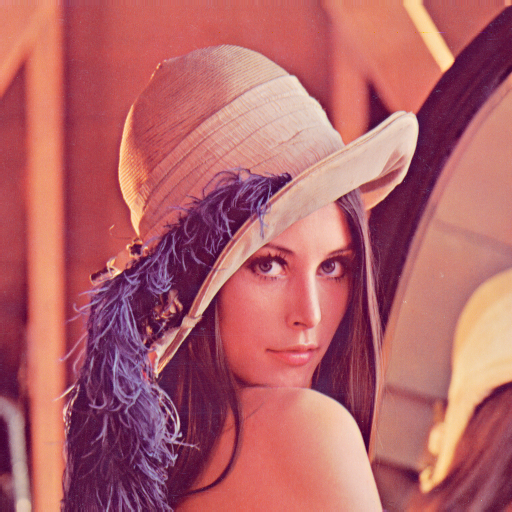

In [ ]:
cv2_imshow(imagem)

# Nova seção

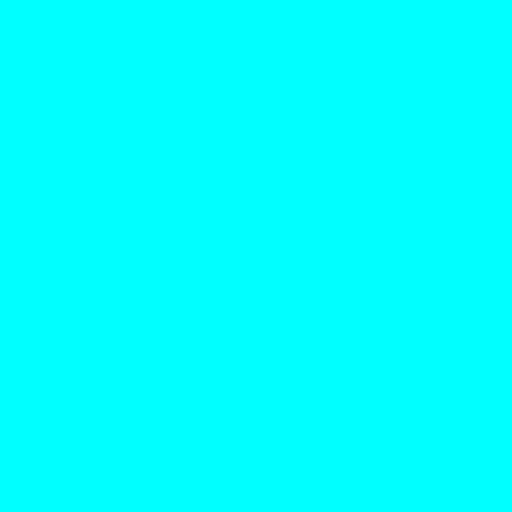

In [ ]:
# from google.colab.patches import cv2_imshow

imagem = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Aula 1/lena.png')
for y in range(0, imagem.shape[0]): #leitura das linhas
  for x in range(0, imagem.shape[1]): #leitura das colunas
    imagem[y, x] = (255,255,0) #BRG
    # nesse exemplo, nas 3 laminas do rgb, zera a lamina R, zera a lamina G e deixa B em 255

# sendo f(x,y), x é linha e y é coluna
# Linhas em pixels: 512
# Colunas em pixels: 512
# Qtde de canais: 3

# o for em y percorre as 512 linhas, e o for em x percorre todas as 512 colunas

# plt.figure(figsize=(10,10))
# plt.imshow(imagem)

cv2_imshow(imagem)
# a ordem do opencv é VGR, e nao rgb

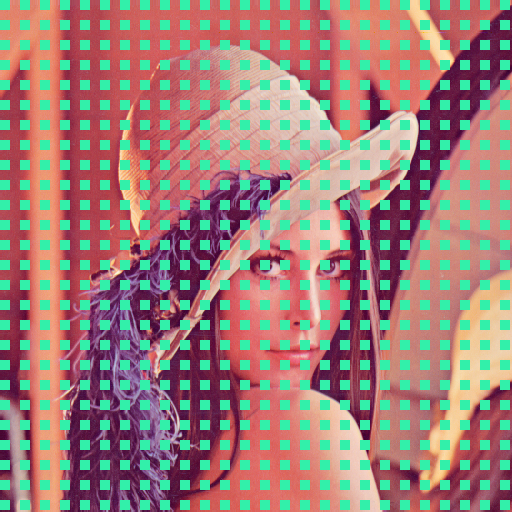

In [ ]:
import cv2
imagem = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Aula 1/lena.png')

#O objetivo agora é saltar a cada 20 pixels ao percorrer as linhas e mais 20 pixels ao percorrer
#as colunas. A cada salto é criado um quadrado azul de 10x10 pixels.

for y in range(0, imagem.shape[0], 20): #percorre linhas -> image.shape[0] é o numero de linhas
  for x in range(0, imagem.shape[1], 20): #percorre colunas -> image.shape[1] é o numero de colunas
    imagem[y:y+10, x: x+10] = (170,240,50)
    # y:y+10, x: x+10 cria quadrados

    #imagens sendo 0 preto e 255 branco, 0,0,0 é preto, 255,255,255 branco
    # todas as 3 com a mesma intensidade vao dar preto, branco ou um tom de cinza

cv2_imshow(imagem) #BGR

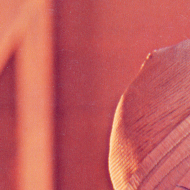

True

In [ ]:
import cv2

#comando crop

imagem = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Aula 1/lena.png')

# recorte = imagem[10:200, 10:200] #f(x,y)
# cv2_imshow(recorte)

#salvando a nova imagem
import numpy as np
import cv2
copia = np.copy(imagem)
mouse_pressed = False

iniciox = inicioy = xfinal = yfinal = -1
cv2.imwrite("recorte.png", recorte) #salva no disco

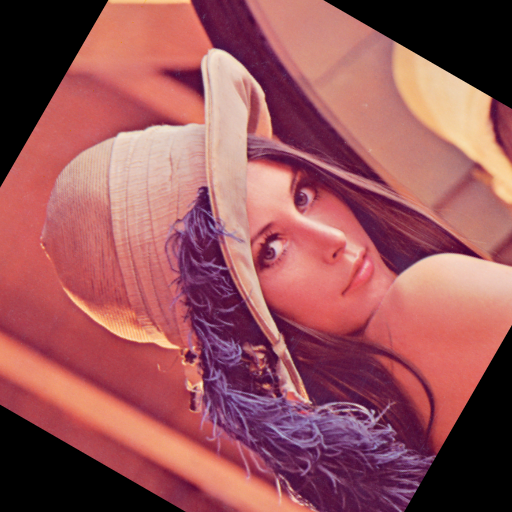

In [ ]:
import numpy as np
import cv2

# comando que permite rotacionar a imagem em diferentes angulos
#comando getRotationMatrix2D

img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Aula 1/lena.png')
(alt, lar) = img.shape[:2] #captura altura e largura
centro = (lar // 2, alt // 2) #acha o centro -> // pega o resto INTEIRO
M = cv2.getRotationMatrix2D(centro, 60, 1.0) #rotação em 60 graus -> parametros é (valor do centro, angulo de rotacao, e zoom)
# 3.0 é zoom in, 0.3 é zoom out
img_rotacionada = cv2.warpAffine(img, M, (lar, alt)) # warp affine rotaciona de fato -> terceiro parametro é zoom in/zoom out
# parametros ^ (imagem, como vai ser a rotacao, (zoom in, zoom out))
cv2_imshow(img_rotacionada)

# pesquisar como adicionar um fundo diferente do preto

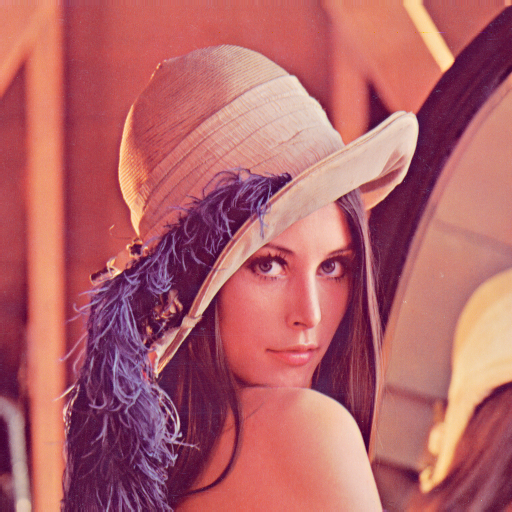

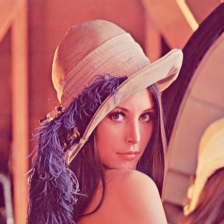

In [ ]:
import numpy as np
import cv2


#comando imshow
#comando resize

img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Aula 1/lena.png')
cv2_imshow(img)
largura = img.shape[1]
altura = img.shape[0]
canais = img.shape[2] # verifica canais

#Para reduzir ou aumentar o tamanho da imagem, existe uma função já pronta do OpenCV, trata-se da função ‘resize’.
#Note que é preciso calcular a proporção da altura em relação a largura da nova imagem, caso contrário ela poderá ficar
#distorcida

proporcao = float(altura/largura) # é preciso manter a proporção, então AQUI precisa manter o float
largura_nova = 224 #em pixels -> em redes convolucionais é sempre 224
altura_nova = int(largura_nova*proporcao)
tamanho_novo = (largura_nova, altura_nova)

img_redimensionada = cv2.resize(img, tamanho_novo, interpolation = cv2.INTER_AREA)
# (imagem que entrou no imread, tamanho novo com altura e largura nova, tipo de interpolação)


#A função ‘rezise’ utiliza uma propriedade aqui definida como cv2.INTER_AREA que é uma especificação
#do cálculo matemático para redimensionar a imagem. Porém, caso a imagem seja redimensionada para um tamanho maior é preciso
#ponderar que ocorrerá perda de qualidade.

cv2_imshow(img_redimensionada)